In [1]:
from __future__ import unicode_literals

In [32]:
import numpy as np
import pandas as pd
import cPickle as pkl

import matplotlib
%matplotlib notebook
#matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
import time

from sklearn.datasets import make_spd_matrix
import sklearn.covariance as skcov

import random
from scipy.stats import multivariate_normal

In [3]:
""" Generates random covariance matrix with `nb` independent blocks
"""
def generate_covariance(n, nb=2):
    sizes=[]
    for i in range(n%nb):
        sizes.append(n//nb+1)
    for i in range(nb-n%nb):
        sizes.append(n//nb)
    assert sum(sizes) == n
    pref = 0
    ret = np.zeros((n, n))
    for s in sizes:
        ret[pref:pref+s, pref:pref+s] = make_spd_matrix(s)
        pref += s
    return ret

In [4]:
nv = 3
myu = np.zeros((nv,))
sigma1 = np.array([
    [1.0, 0.95, 0.0],
    [0.95, 1.0, 0.0],
    [0.0, 0.0, 1.0]
])
diag = np.eye(nv)

In [5]:
X = []
for i in range(8):
    X += [np.random.multivariate_normal(myu, sigma1)]
for i in range(10):
    cov = np.array(sigma1)
    cov[0][1] /= (2**i)
    cov[1][0] /= (2**i)
    cov[1][2] = cov[2][1] = 1.0 - 1.0 / (2**i)
    X += [np.random.multivariate_normal(myu, cov)]
for i in range(8):
    X += [np.random.multivariate_normal(myu, diag)]

<IPython.core.display.Javascript object>


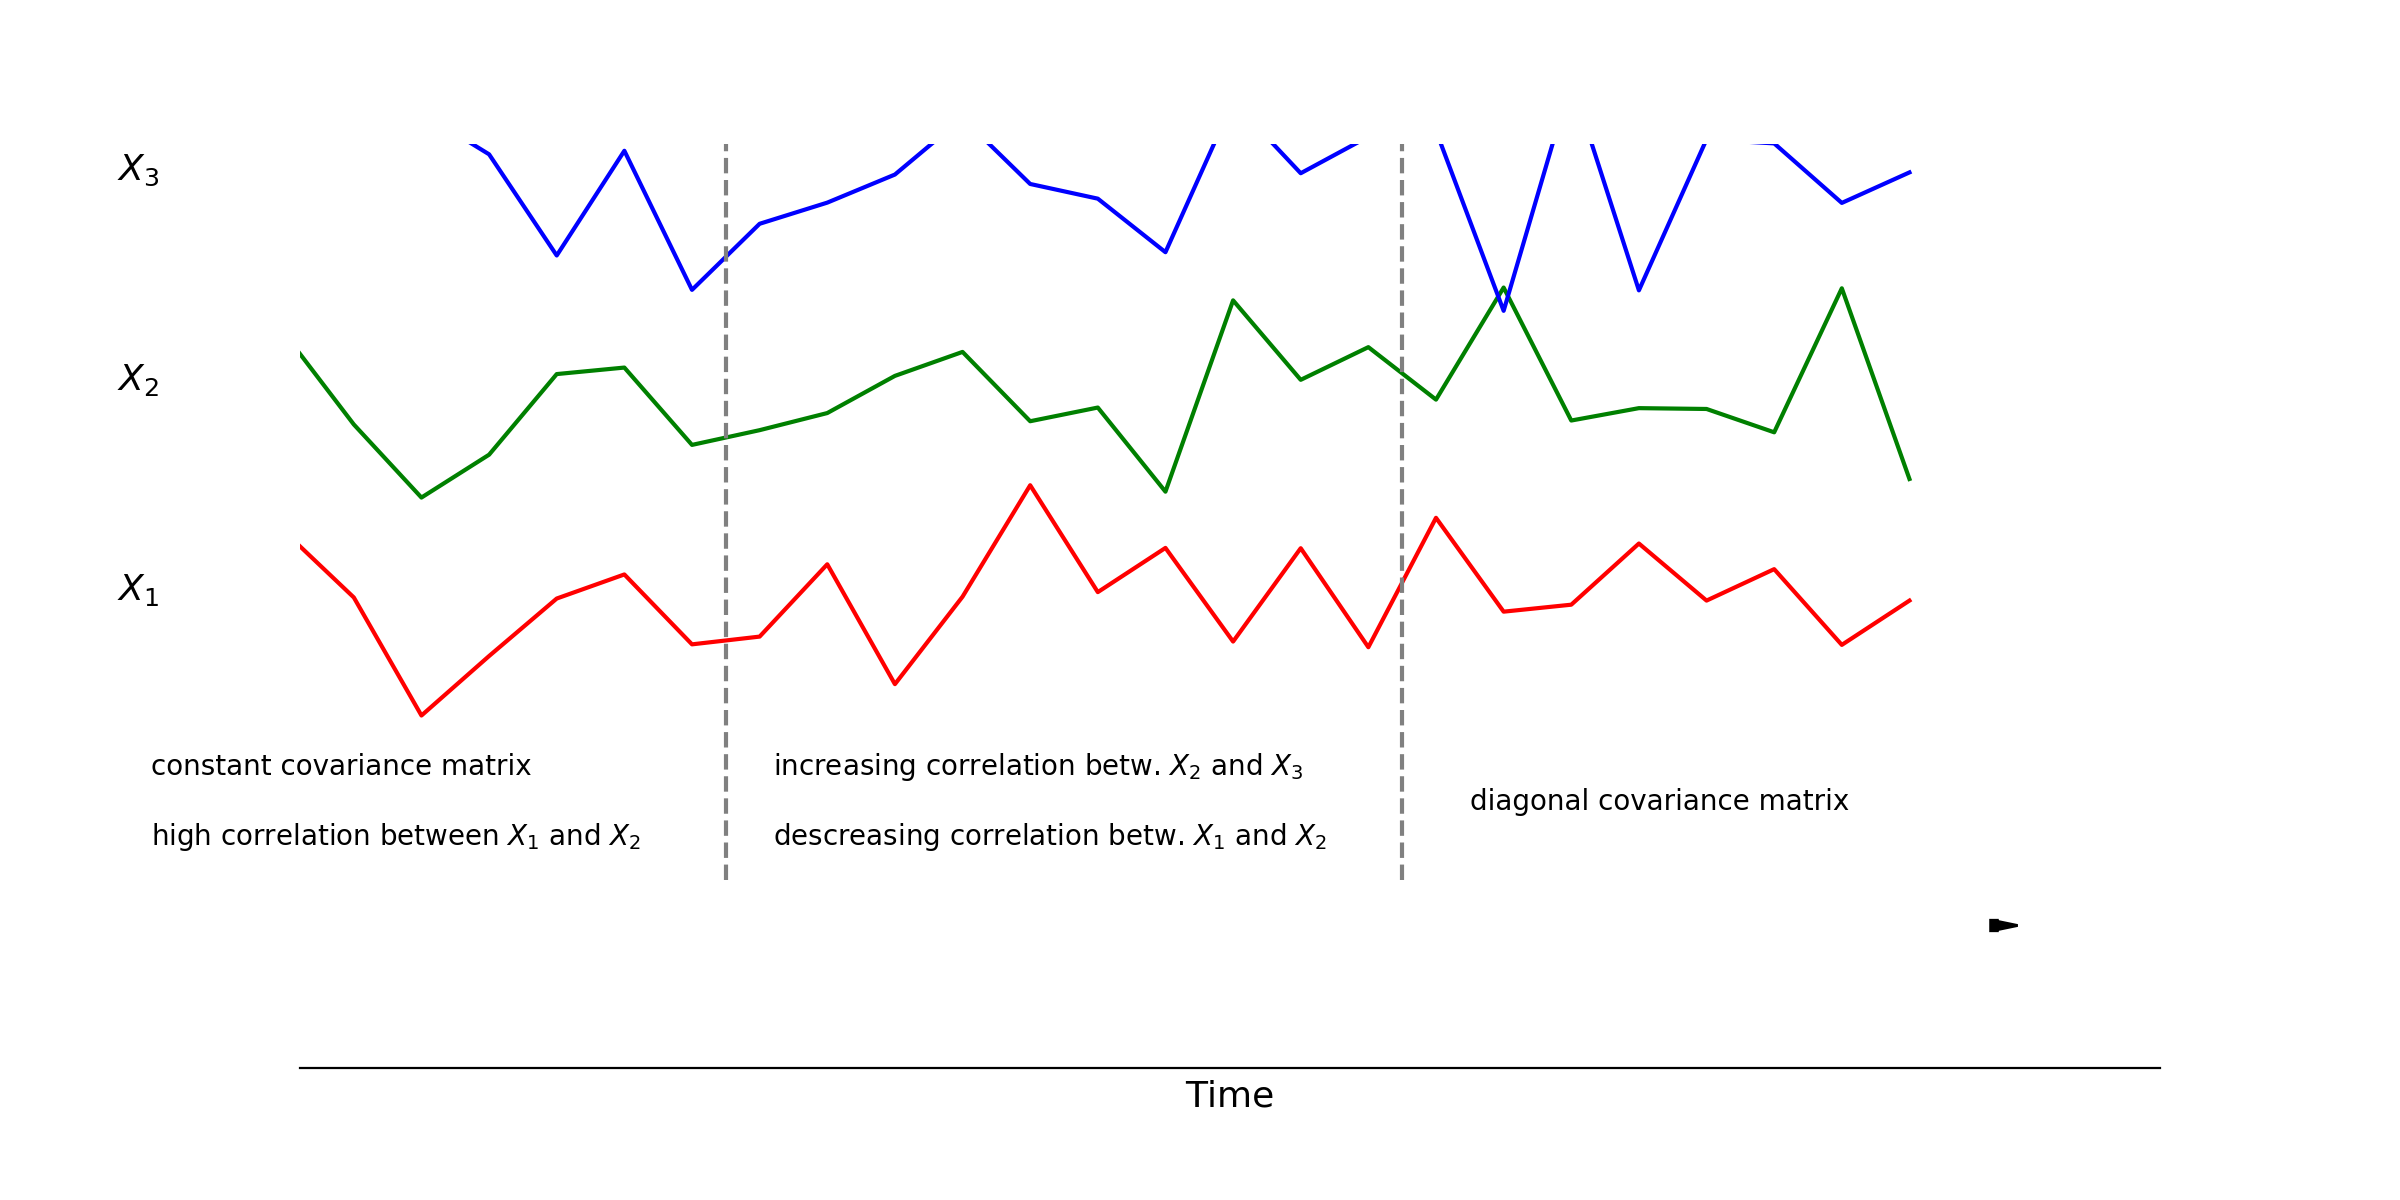

In [16]:
X = np.array(X)
colors = ['red', 'green', 'blue', 'magenta']
plt.figure(figsize=(12, 6))
for i in range(nv):
    plt.plot(3*i + X[:, i], c=colors[i])

plt.xticks([])
plt.yticks([])
plt.text(-1.5,0,"$X_1$",fontsize=13)
plt.text(-1.5,3,"$X_2$",fontsize=13)
plt.text(-1.5,6,"$X_3$",fontsize=13)
plt.xlabel("Time", fontsize=13)
for i, spine in enumerate(plt.gca().spines.values()):
    if i == 0:
        spine.set_visible(False)
    if i == 1:
        spine.set_visible(False)
    if i == 3:
        spine.set_visible(False)
plt.arrow(26.2, -4.65, 0.1, 0, width=0.15, color="k", clip_on=False, head_width=0.12, head_length=0.3)
#plt.plot([],[])
#plt.xticks(range(len(X)))

plt.plot([7.5, 7.5], [-4, 8], '--', c='gray')
plt.plot([17.5, 17.5], [-4, 8], '--', c='gray')

plt.text(-1, -2.5, "constant covariance matrix", fontsize=10)
plt.text(-1, -3.5, "high correlation between $X_1$ and $X_2$", fontsize=10)


plt.text(8.2, -2.5, "increasing correlation betw. $X_2$ and $X_3$", fontsize=10)
plt.text(8.2, -3.5, "descreasing correlation betw. $X_1$ and $X_2$", fontsize=10)

plt.text(18.5, -3.0, "diagonal covariance matrix", fontsize=10)

plt.show()

<IPython.core.display.Javascript object>


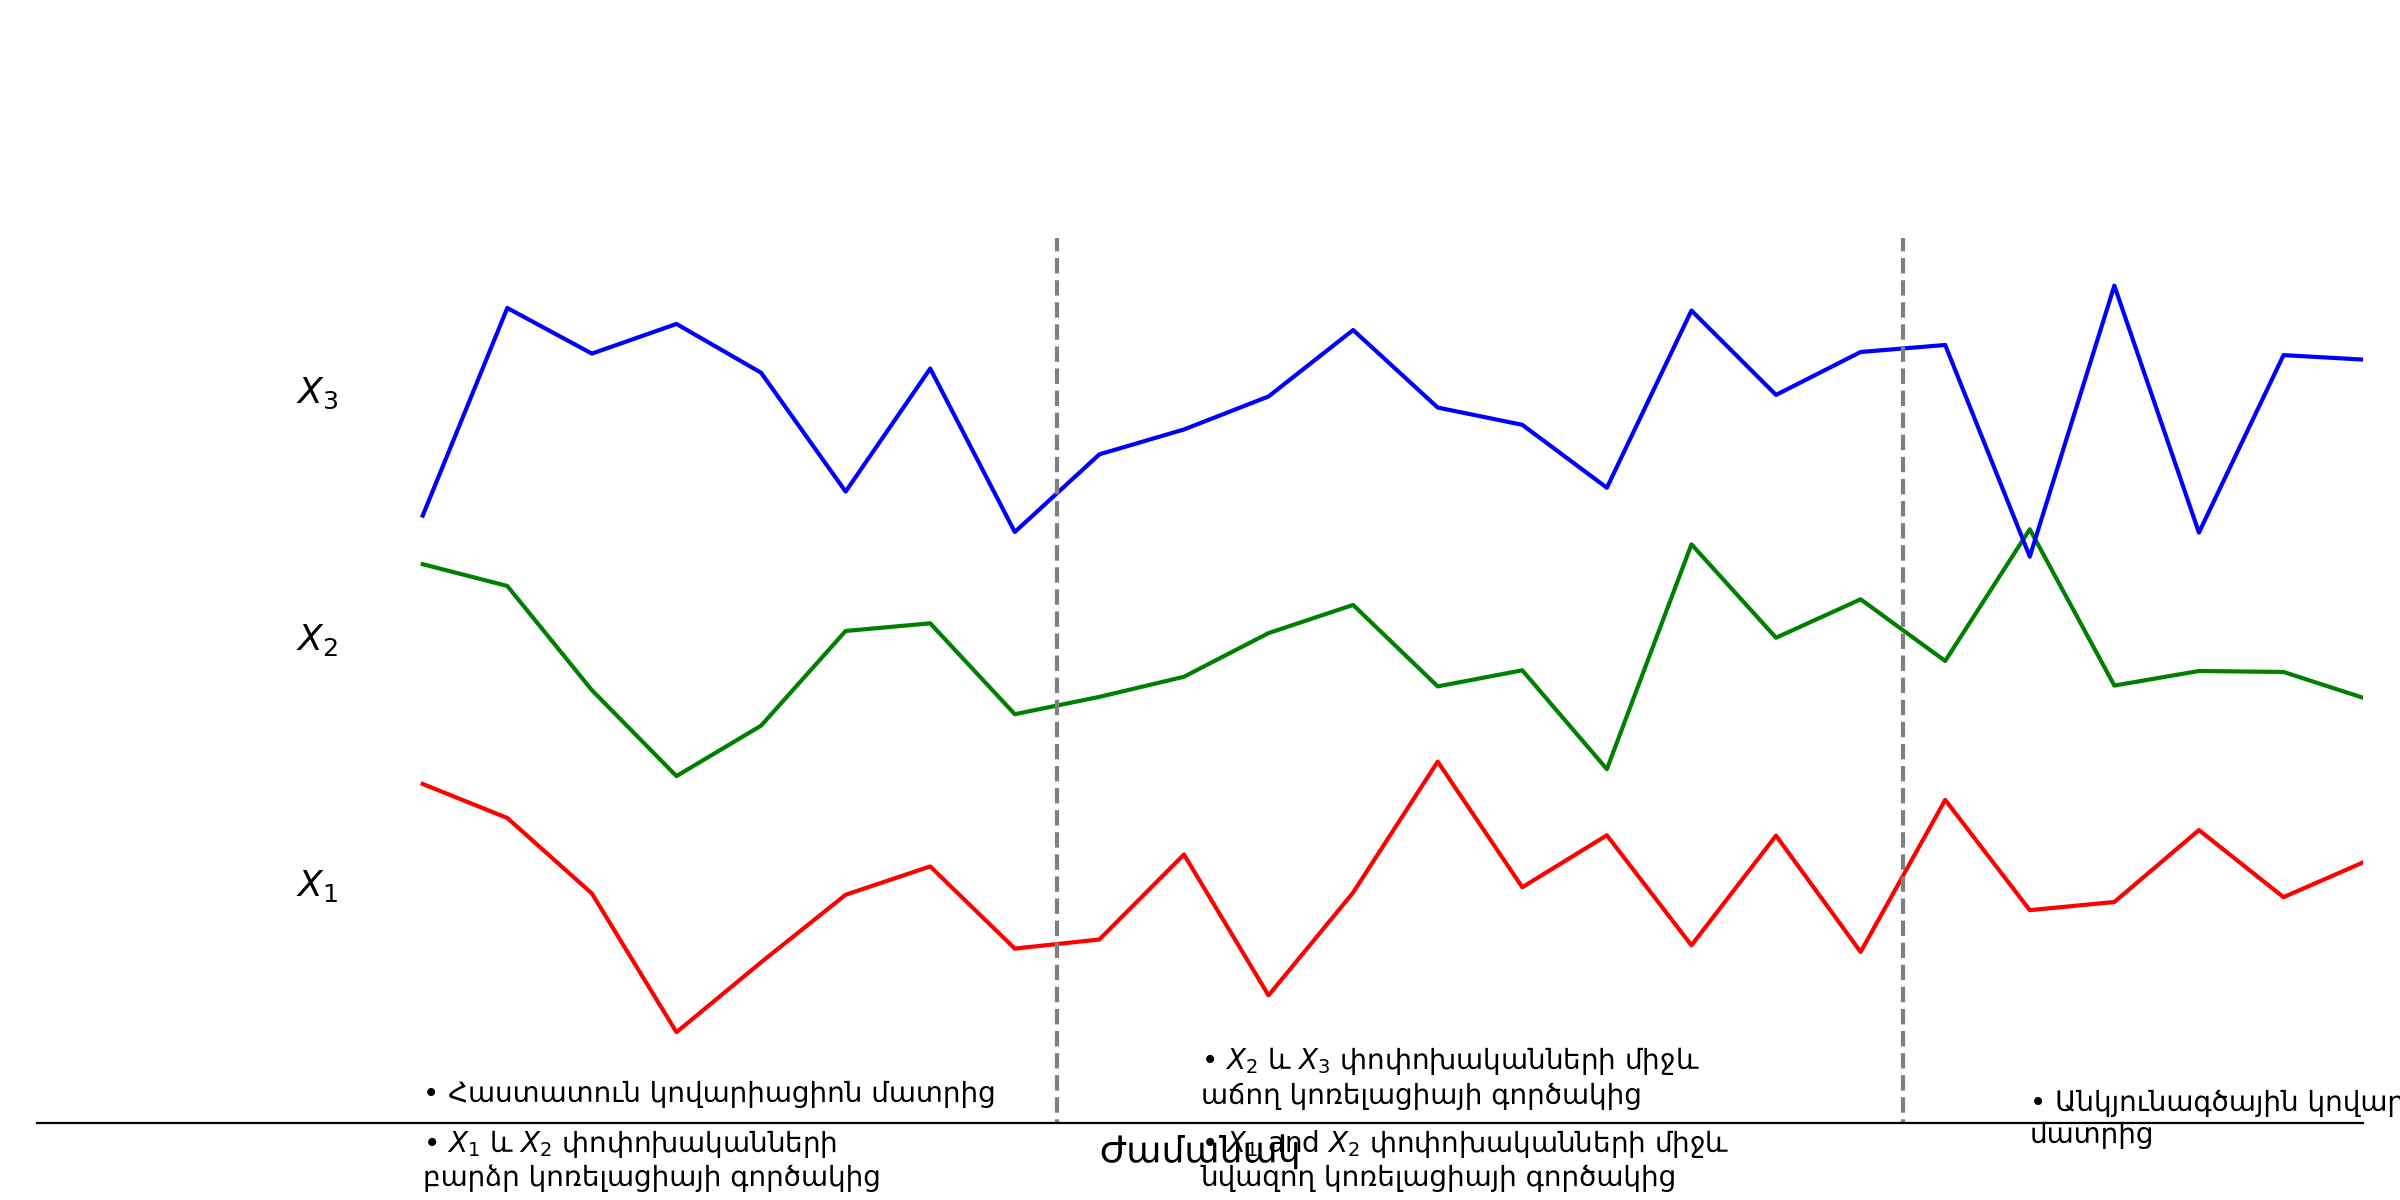

In [39]:
with PdfPages('time-series.pdf') as pdf:
    X = np.array(X)
    colors = ['red', 'green', 'blue', 'magenta']
    plt.figure(figsize=(12, 6))
    for i in range(nv):
        plt.plot(3*i + X[:, i], c=colors[i])

    plt.xticks([])
    plt.yticks([])
    plt.text(-1.5,0,"$X_1$",fontsize=13)
    plt.text(-1.5,3,"$X_2$",fontsize=13)
    plt.text(-1.5,6,"$X_3$",fontsize=13)
    plt.xlabel(u"Ժամանակ", fontsize=13)
    for i, spine in enumerate(plt.gca().spines.values()):
        if i == 0:
            spine.set_visible(False)
        if i == 1:
            spine.set_visible(False)
        if i == 3:
            spine.set_visible(False)
    plt.arrow(26.2, -4.65, 0.1, 0, width=0.15, color="k", clip_on=False, head_width=0.12, head_length=0.3)
    #plt.plot([],[])
    #plt.xticks(range(len(X)))

    plt.plot([7.5, 7.5], [-4, 8], '--', c='gray')
    plt.plot([17.5, 17.5], [-4, 8], '--', c='gray')

    plt.text(0, -2.5, u"\u2022 Հաստատուն կովարիացիոն մատրից", fontsize=10)
    plt.text(0, -3.5, u"\u2022 $X_1$ և $X_2$ փոփոխականների\nբարձր կոռելացիայի գործակից", fontsize=10)


    plt.text(9.2, -2.5, u"\u2022 $X_2$ և $X_3$ փոփոխականների միջև\nաճող կոռելացիայի գործակից", fontsize=10)
    plt.text(9.2, -3.5, u"\u2022 $X_1$ and $X_2$ փոփոխականների միջև\nնվազող կոռելացիայի գործակից", fontsize=10)

    plt.text(19, -3.0, u"\u2022 Անկյունագծային կովարիացիոն\nմատրից", fontsize=10)

    plt.tight_layout()
    plt.show()
    pdf.savefig()